# Python Opencv图像处理基础

本文档地址：[https://github.com/IBBD/IBBD.github.io/blob/master/python/python-opencv-guidelines.ipynb](https://github.com/IBBD/IBBD.github.io/blob/master/python/python-opencv-guidelines.ipynb )

## 1. 安装与基础使用

In [ ]:
# 安装
!pip install opencv-python

In [ ]:
import cv2
import numpy as np

In [ ]:
# 加载
path = 'images/21043001.jpg'
img = cv2.imread(path)
if img is None:
    raise Exception('加载图像失败')

# 保存
cv2.imwrite('test.jpg', img)

注意：如果图像路径中存在中文，则会加载失败，需要换一种方式：

In [ ]:
# 加载
img = cv2.imdecode(np.fromfile(path, dtype=np.uint8), cv2.IMREAD_COLOR)

# 保存
cv2.imencode('.png', img)[1].tofile('test.png')

中文路径在服务器上可能比较少碰到，但是，在windows上开发的同事可能会经常碰到。

In [ ]:
type(img)

本质上，opencv的数据结构是numpy中的多维数组，所以很多numpy中的方法是可以直接用到图像上的。这个和pillow不同，后者是有自己特定的数据结构的。

In [ ]:
img[0:2, 0:2]

In [ ]:
type(img[1, 1, 1])

每个值的类型是8位的无符号整数（0-255）。

## 2. Opencv与pillow，base64的转换

在实际开发中，经常使用的图像工具还有`pillow`，以及在接口里经常要用的base64字符串，这三者是经常需要转换的：

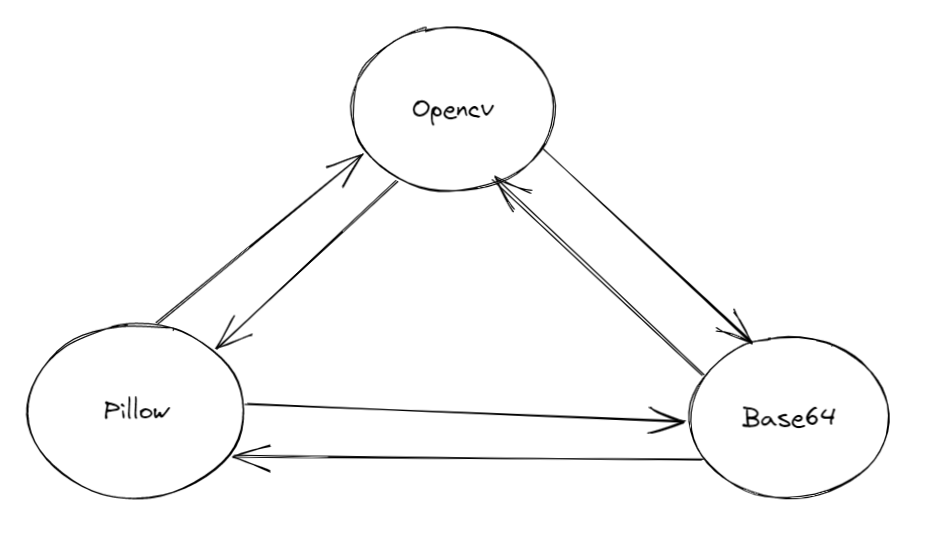

都已经封装到[https://github.com/ibbd-dev/python-image-utils/blob/master/image_utils/convert.py](https://github.com/ibbd-dev/python-image-utils/blob/master/image_utils/convert.py )

主要就是6个函数：

- cv2_pil
- cv2_base64
- pil_cv2
- pil_base64
- base64_cv2
- base64_pil

直接使用这个包需要先安装，具体可以看项目的readme文件。

In [ ]:
from image_utils.convert import cv2_pil, pil_cv2

In [ ]:
from IPython.display import display
from image_utils.convert import cv2_pil, pil_cv2

path = 'images/21043001.jpg'
img = cv2.imread(path)
display(cv2_pil(img))

## 3. 维度与通道

平时看起来图像是二维的，有宽和高，但是实际上，图像是三维的（数据结构）:

In [ ]:
path = 'images/21043001.jpg'
img = cv2.imread(path)

img.shape

In [ ]:
# 高度，宽度，通道数
# 注意第一个是高度
h, w, c = img.shape

高度和宽度比较好理解，对应的就是一个像素，但是一个像素通常不是一个单一的值，例如对于普通的彩色图像，可能是三个值：R，G，B。这三个值经过计算之后，才能决定一个像素展示出来的颜色。

可以将不同的通道分离出来：

In [ ]:
# 获取单个像素的值
img[1, 1]

In [ ]:
img = cv2.imread(path)
img_b, img_g, img_r = cv2.split(img)
img_b.shape

也可以单独拿某个通道：

In [ ]:
img_r = img[:, :, 0]
img_g = img[:, :, 1]
img_b = img[:, :, 2]
img_g.shape

## 4. 颜色空间

颜色空间是图像处理中比较重要的概念，也是比较复杂的概念，具体可以看这个文章[https://zhuanlan.zhihu.com/p/112790325](https://zhuanlan.zhihu.com/p/112790325 )。在opencv中，主要使用的颜色空间有：

- BGR：这是opencv默认的颜色空间，需要特别注意。
- RGB：这里我们常见的。
- HSV
- GRAY：灰度空间
- RGBA：带透明度的颜色空间，通常是png图像

前面三种的通道数都是3，灰度空间的通道数只有1（只有黑白灰），而RGBA是4个通道（在RGB的基础上增加了一个通道，用来表示透明度）。

In [ ]:
path = 'images/21043001.jpg'
img = cv2.imread(path)   # BGR
display(cv2_pil(img))

将BGR颜色空间直接转换为pillow的图像进行展示，颜色跟原图就会有差别。

In [ ]:
img = cv2.imread(path)
img_pil = cv2_pil(img)
img_pil.save('test_pil.jpg')

In [ ]:
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(cv2_pil(img))

先将BGR转换为RGB，再转成pillow对象，才能正常的展示出来。

In [ ]:
img = cv2.imread(path)
print("BGR:", img.shape)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("RGB:", img.shape)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print("GRAY:", gray.shape)

和我们直觉理解不一样的一点是：白色的值是255，而黑色的只是0，不要混淆了。

In [ ]:
img[:2, :2]

In [ ]:
gray[:2, :2]

### 4.1 RGB颜色空间

In [ ]:
img = cv2.imread(path)
img_b, img_g, img_r = cv2.split(img)

display(cv2_pil(img_b))
display(cv2_pil(img_g))
display(cv2_pil(img_r))

### 4.2 HSV 颜色空间

In [ ]:
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_h, img_s, img_v = cv2.split(img)

display(cv2_pil(img_h))
display(cv2_pil(img_s))
display(cv2_pil(img_v))

### 4.3 GRAY颜色空间

In [ ]:
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
display(cv2_pil(gray))`

## 5. 二值化

灰度图是通道数为1的图像，每个像素点的值的取值范围是0-255（np.uint8)，白色为255，黑色为0，中间的取值为灰色。不过有时只有灰度图还不够，还需要处理成只有黑白两种颜色的图像。通道数还是1，只是每个像素点的取值只能是0或者255。

在opencv中处理成二值图像的方法有好几个，具体看[https://blog.csdn.net/bugang4663/article/details/109589177](https://blog.csdn.net/bugang4663/article/details/109589177 )

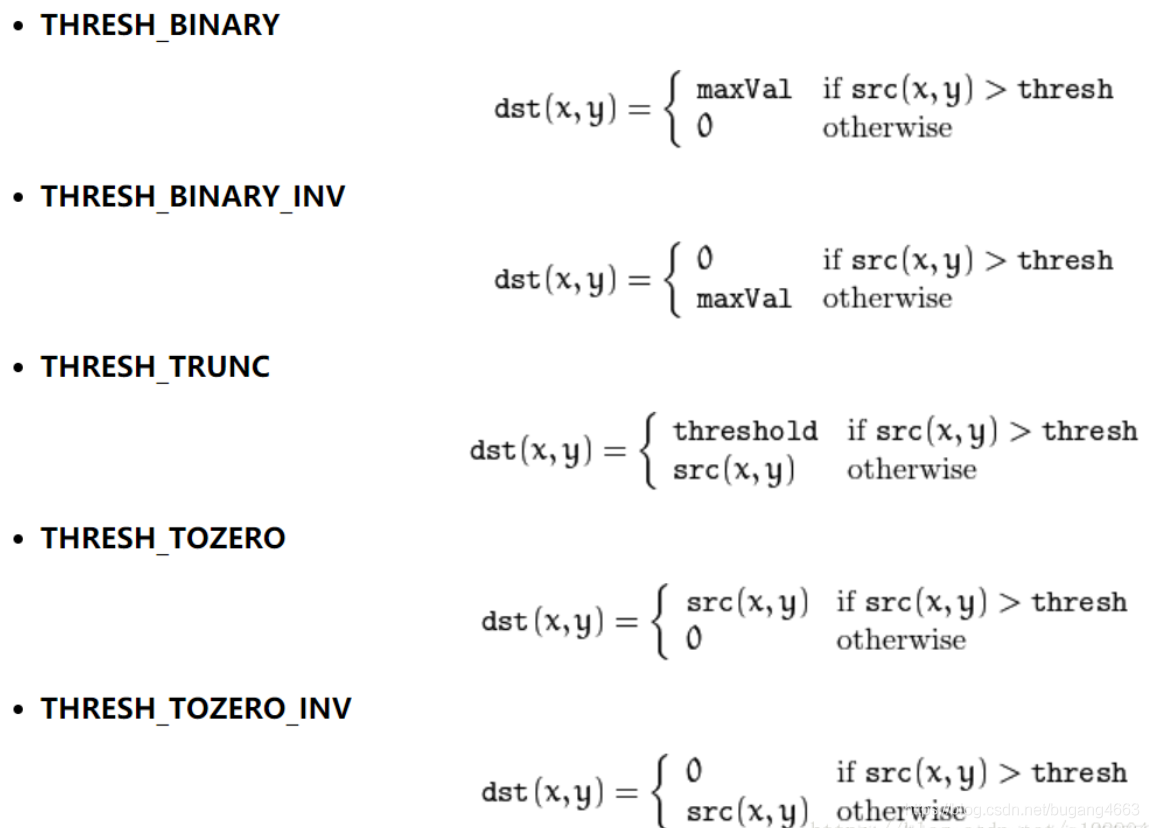

上图所示的方法，只有前两个是二值化，后面是截断，计算方法类似。

### 5.1 局部阈值法

In [ ]:
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 1)
display(cv2_pil(binary))

### 5.2 大津阈值法

根据双峰图像的图像直方图自动计算阈值。 （对于非双峰图像，二值化效果就不好了）

In [ ]:
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr, binary2 = cv2.threshold(gray, 0, 255, 
                             cv2.THRESH_BINARY+cv2.THRESH_OTSU)
display(cv2_pil(binary2))
thr

全局阈值还有好几个，不一一列举。

不过，这些方法都很难得到比较通用的二值化效果，对不同的图像可能都得做一些手动的处理，很难自动化。自动化二值图像可能得借助深度学习的方法才行。

## 6. 图像运算与二值运算

In [ ]:
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
# 变暗
gray2 = gray // 2
display(cv2_pil(gray2))

要让灰度图像变暗，只要让每个像素的值减少即可，例如直接将​像素值减半。

In [ ]:
# 变亮
tmp = (255 - gray) // 2
gray2 = gray + tmp
display(cv2_pil(gray2))

In [ ]:
# 二值图像取反色
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, 
                          cv2.THRESH_BINARY+cv2.THRESH_OTSU)

binary = cv2.bitwise_not(binary)
display(cv2_pil(binary))

当然上面这个取反色的例子只是作为演示，实际上而生成二值图像的参数`cv2.THRESH_BINARY`改为`cv2.THRESH_BINARY_INV`就能变成反色。

除了`bitwise_not`，还有另外几个：

- bitwise_and
- bitwise_or
- bitwise_xor

二值化图像，其实就是类似布尔值了，可以做布尔运算也不出奇。

## 7. 裁剪，缩放与旋转

裁剪在pillow中是有一个专门的方法的，不过在opencv中并不需要，使用numpy的语法就能解决：

In [ ]:
# 裁剪
img = cv2.imread(path)
img_crop = img[10:100, 20:200]
display(cv2_pil(img_crop))

裁剪语法：`img[y1:y2, x1:x2]`

In [ ]:
# 缩放
cv2.resize?

旋转有两类，一类是直接使用numpy的方法：

In [ ]:
np.rot90?

另一类是比较复杂的旋转，实现可以看这里[https://github.com/ibbd-dev/python-image-utils/blob/master/image_utils/convert.py](https://github.com/ibbd-dev/python-image-utils/blob/master/image_utils/convert.py )

实现如下：

In [ ]:
def rotate(image, angle, center=None, scale=1.0, 
           borderValue=(255, 255, 255)):
    """cv2旋转图像
    效果比Image.rotate效果要好
    :param image cv2图像对象
    :param angle 旋转角度（注意这里是角度，而不是弧度）
    :param center 中心点
    :param scale 缩放比例
    :param borderValue 填充颜色，默认为白色
    """
    # 获取图像尺寸
    (h, w) = image.shape[:2]

    # 若未指定旋转中心，则将图像中心设为旋转中心
    if center is None:
        center = (w / 2, h / 2)

    # 执行旋转
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h), 
                             borderValue=borderValue)

    # 返回旋转后的图像
    return rotated

以上函数可以通过`from image_utils.convert import rotate`来引用。可以指定旋转的中心点，旋转的角度，填充颜色等。

## 8. 使用蒙版

使用一个图像作为蒙版（mask），来控制另一个图像展示。使用蒙版可以实现很多叠加的效果。

In [ ]:
logo = cv2.imread('images/test.png')
display(cv2_pil(logo))
logo.shape

例如只展示上图中黑色的部分，白色部分则置为白色：

In [ ]:
img = cv2.imread(path)
display(cv2_pil(img))

In [ ]:
# 处理蒙版
img = cv2.imread(path)
logo = cv2.resize(logo, img.shape[:2][::-1])
mask = cv2.cvtColor(logo, cv2.COLOR_BGRA2GRAY)
mask>127

上面的蒙版是一个灰度图，每个像素都有一个0-255的值，`mask>127`表示每个像素值和127比较，如果比127大则为True，否则为False。

In [ ]:
# 将蒙版为True的位置对应到图像的像素赋值为白色
img[mask>127] = 255    # 这也可以赋值为：(255,255,255)
display(cv2_pil(img))

赋值为255和赋值为`(255,255,255)`效果是一样的，numpy会自动将255广播成`(255,255,255)`，关于numpy的广播机制可以看这里[https://www.numpy.org.cn/user/basics/broadcasting.html#%E4%B8%80%E8%88%AC%E5%B9%BF%E6%92%AD%E8%A7%84%E5%88%99](https://www.numpy.org.cn/user/basics/broadcasting.html#%E4%B8%80%E8%88%AC%E5%B9%BF%E6%92%AD%E8%A7%84%E5%88%99 )

In [ ]:
# 也可以赋值为其他颜色
img[mask>127] = (0, 0, 255)
display(cv2_pil(img))

## 9. 作业

将上图作为水印显示在某个图像上。